# Import libraries

In [2]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import cv2
import os

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Read csv file

In [3]:
p = os.getcwd()
print(p)

os.chdir("..")
d = os.getcwd()
print(d)

dirname = os.path.dirname(d)
csvfile = os.path.join(d, 'datasets/cartoon_set/labels.csv')
dirname = os.path.dirname(d)
imgfile = os.path.join(d, 'datasets/cartoon_set/img/')


dataset = pd.read_csv(csvfile, sep='\\t', engine='python')

dataset.head()

/Users/mel/Documents/MRes/Machine Learning/Assignment/AMLS_20-21_SN12345678/B1
/Users/mel/Documents/MRes/Machine Learning/Assignment/AMLS_20-21_SN12345678


,eye_color,face_shape,file_name
0,1,4,0.png
1,2,4,1.png
2,2,3,2.png
3,2,0,3.png
4,0,2,4.png


# Load and preprocess data

In [3]:
dataset_image = []
for i in tqdm(range(dataset.shape[0])):
    img = image.load_img(imgfile+dataset['file_name'][i], target_size=(100,100))
    img = img.convert('L')
    img = image.img_to_array(img)
    img = img/255

    dataset_image.append(img)

100%|██████████| 10000/10000 [01:08<00:00, 145.95it/s]


# Label and split the data

In [4]:
# Label the data
x = np.array(dataset_image)
y = dataset['face_shape']

In [5]:
# Split the data into training and testing(75% training and 25% testing data)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=100)

In [6]:
x.shape

(10000, 100, 100, 1)

In [7]:
#Convert data type to 'float32'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [8]:
#One-hot encoding of data
n_classes = 5
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (7500,)
Shape after one-hot encoding:  (7500, 5)


# Optimise batch size

In [9]:
#Evaluate with batch size=128

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
history=model.fit(x_train, Y_train, batch_size=128, epochs=50, validation_data=(x_test, Y_test), callbacks=[es])

Epoch 1/50
59/59 [==============================] - 44s 738ms/step - loss: 1.4390 - accuracy: 0.4112 - val_loss: 1.5376 - val_accuracy: 0.5072
Epoch 2/50
59/59 [==============================] - 43s 723ms/step - loss: 0.2276 - accuracy: 0.9676 - val_loss: 1.1486 - val_accuracy: 0.4172
Epoch 3/50
59/59 [==============================] - 43s 730ms/step - loss: 0.0500 - accuracy: 0.9964 - val_loss: 1.3597 - val_accuracy: 0.5620
Epoch 4/50
59/59 [==============================] - 43s 734ms/step - loss: 0.0257 - accuracy: 0.9991 - val_loss: 4.0892 - val_accuracy: 0.3160
Epoch 5/50
59/59 [==============================] - 43s 725ms/step - loss: 0.0154 - accuracy: 0.9997 - val_loss: 0.4970 - val_accuracy: 0.9640
Epoch 6/50
59/59 [==============================] - 42s 719ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.2511 - val_accuracy: 0.9984
Epoch 7/50
59/59 [==============================] - 43s 729ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.1331 - val_accuracy: 0.9992

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


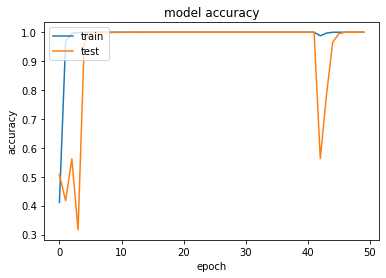

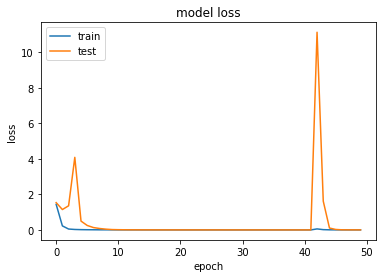

In [10]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Find accuracy on test set

In [4]:
dirname = os.path.dirname(d)
csvtest = os.path.join(d, 'test/cartoon_set_test/labels.csv')
dirname = os.path.dirname(d)
imgtest = os.path.join(d, 'test/cartoon_set_test/img/')


dataset = pd.read_csv(csvtest, sep='\\t', engine='python')

dataset.head()

,eye_color,face_shape,file_name
0,1,4,0.png
1,2,4,1.png
2,2,3,2.png
3,2,0,3.png
4,0,2,4.png


In [12]:
test_dataset_image = []
for i in tqdm(range(test_dataset.shape[0])):
    img = image.load_img(imgtest+test_dataset['file_name'][i], target_size=(100,100))
    img = img.convert('L')
    img = image.img_to_array(img)
    img = img/255

    test_dataset_image.append(img)

100%|██████████| 2500/2500 [00:18<00:00, 131.72it/s]


In [13]:
# Label the data and one-hot encoding
X_TEST = np.array(test_dataset_image)
Y_TEST = test_dataset['face_shape']

n_classes = 5
Y_TEST = np_utils.to_categorical(Y_TEST, n_classes)

In [14]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(100,100,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(5, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
history=model.fit(x_train, Y_train, batch_size=128, epochs=50, validation_data=(X_TEST, Y_TEST), callbacks=[es])

Epoch 1/50
59/59 [==============================] - 43s 729ms/step - loss: 1.0580 - accuracy: 0.5955 - val_loss: 1.0444 - val_accuracy: 0.5824
Epoch 2/50
59/59 [==============================] - 43s 736ms/step - loss: 0.0571 - accuracy: 0.9940 - val_loss: 0.6224 - val_accuracy: 0.7868
Epoch 3/50
59/59 [==============================] - 42s 718ms/step - loss: 0.0213 - accuracy: 0.9991 - val_loss: 0.2633 - val_accuracy: 0.9908
Epoch 4/50
59/59 [==============================] - 45s 764ms/step - loss: 0.0130 - accuracy: 0.9996 - val_loss: 0.1831 - val_accuracy: 0.9956
Epoch 5/50
59/59 [==============================] - 43s 725ms/step - loss: 0.0080 - accuracy: 0.9999 - val_loss: 0.0868 - val_accuracy: 0.9996
Epoch 6/50
59/59 [==============================] - 43s 730ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0393 - val_accuracy: 1.0000
Epoch 7/50
59/59 [==============================] - 43s 733ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0234 - val_accuracy: 1.0000